In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from vega_datasets import data


In [2]:
df = data.sf_temps()

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
print(type(df.date))

df.date = pd.to_datetime(df.date)

df.info()
df.head()


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
df = df.set_index(df.date)

df.head()

,temp,date
date,,
2010-01-01 00:00:00,47.8,2010-01-01 00:00:00
2010-01-01 01:00:00,47.4,2010-01-01 01:00:00
2010-01-01 02:00:00,46.9,2010-01-01 02:00:00
2010-01-01 03:00:00,46.5,2010-01-01 03:00:00
2010-01-01 04:00:00,46.0,2010-01-01 04:00:00


In [5]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month_name()
df['weekday'] = df.date.dt.day_name()

df.head()

,temp,date,year,month,weekday
date,,,,,
2010-01-01 00:00:00,47.8,2010-01-01 00:00:00,2010,January,Friday
2010-01-01 01:00:00,47.4,2010-01-01 01:00:00,2010,January,Friday
2010-01-01 02:00:00,46.9,2010-01-01 02:00:00,2010,January,Friday
2010-01-01 03:00:00,46.5,2010-01-01 03:00:00,2010,January,Friday
2010-01-01 04:00:00,46.0,2010-01-01 04:00:00,2010,January,Friday


In [6]:
df.isna().sum()

temp       0
date       0
year       0
month      0
weekday    0
dtype: int64

In [7]:
df = df.drop(columns= ['date'])
df.head()

,temp,year,month,weekday
date,,,,
2010-01-01 00:00:00,47.8,2010,January,Friday
2010-01-01 01:00:00,47.4,2010,January,Friday
2010-01-01 02:00:00,46.9,2010,January,Friday
2010-01-01 03:00:00,46.5,2010,January,Friday
2010-01-01 04:00:00,46.0,2010,January,Friday


1. Resample by the day and take the average temperature. Visualize the average temperature over time.
1. Write the code necessary to visualize the minimum temperature over time.
1. Write the code necessary to visualize the maximum temperature over time.

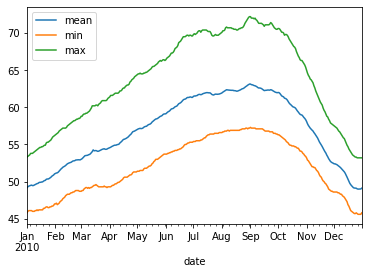

In [8]:
df.resample('D').temp.mean().plot()
df.resample('D').temp.min().plot()
df.resample('D').temp.max().plot()
plt.legend(['mean', 'min', 'max'])

4. Which month is the coldest, on average?


In [9]:
df.resample('M').temp.mean().idxmin().month_name()


'January'

5. Which month has the highest average temperature?


In [10]:
df.resample('M').temp.mean().idxmax().month_name()

'September'

6. Resample by the day and calculate the min and max temp for the day.

In [11]:
df['day_min'] = df.resample('D').temp.min()
df['day_max'] = df.resample('D').temp.max()
df_min_max = df.copy()[(df.day_min.notna()) & (df.day_max.notna())]

df_min_max.head()

,temp,year,month,weekday,day_min,day_max
date,,,,,,
2010-01-01,47.8,2010,January,Friday,45.8,53.3
2010-01-02,47.9,2010,January,Saturday,46.0,53.4
2010-01-03,48.0,2010,January,Sunday,46.1,53.5
2010-01-04,48.1,2010,January,Monday,46.1,53.6
2010-01-05,48.0,2010,January,Tuesday,46.1,53.8


In [12]:
df_min_max['temp_change'] = df_min_max.day_max - df_min_max.day_min

df_min_max.head()

,temp,year,month,weekday,day_min,day_max,temp_change
date,,,,,,,
2010-01-01,47.8,2010,January,Friday,45.8,53.3,7.5
2010-01-02,47.9,2010,January,Saturday,46.0,53.4,7.4
2010-01-03,48.0,2010,January,Sunday,46.1,53.5,7.4
2010-01-04,48.1,2010,January,Monday,46.1,53.6,7.5
2010-01-05,48.0,2010,January,Tuesday,46.1,53.8,7.7


In [13]:
df_min_max.resample('M').temp_change.mean().max()

14.403333333333332

In [14]:
seattle_wx = data.seattle_weather()

seattle_wx.info()
seattle_wx.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [15]:
seattle_wx.date = pd.to_datetime(seattle_wx.date)
seattle_wx['week_day'] = seattle_wx.date.dt.day_name()
seattle_wx['month'] = seattle_wx.date.dt.month_name()
seattle_wx['year'] = seattle_wx.date.dt.year


In [16]:
seattle_wx = seattle_wx.set_index(seattle_wx.date)
seattle_wx.info()
seattle_wx.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
 6   week_day       1461 non-null   object        
 7   month          1461 non-null   object        
 8   year           1461 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 114.1+ KB


,date,precipitation,temp_max,temp_min,wind,weather,week_day,month,year
date,,,,,,,,,
2012-01-01,2012-01-01,0.0,12.8,5.0,4.7,drizzle,Sunday,January,2012
2012-01-02,2012-01-02,10.9,10.6,2.8,4.5,rain,Monday,January,2012
2012-01-03,2012-01-03,0.8,11.7,7.2,2.3,rain,Tuesday,January,2012
2012-01-04,2012-01-04,20.3,12.2,5.6,4.7,rain,Wednesday,January,2012
2012-01-05,2012-01-05,1.3,8.9,2.8,6.1,rain,Thursday,January,2012


In [17]:
seattle_wx = seattle_wx.rename(columns= {'precipitation': 'precip'})
seattle_wx.head()

,date,precip,temp_max,temp_min,wind,weather,week_day,month,year
date,,,,,,,,,
2012-01-01,2012-01-01,0.0,12.8,5.0,4.7,drizzle,Sunday,January,2012
2012-01-02,2012-01-02,10.9,10.6,2.8,4.5,rain,Monday,January,2012
2012-01-03,2012-01-03,0.8,11.7,7.2,2.3,rain,Tuesday,January,2012
2012-01-04,2012-01-04,20.3,12.2,5.6,4.7,rain,Wednesday,January,2012
2012-01-05,2012-01-05,1.3,8.9,2.8,6.1,rain,Thursday,January,2012


In [18]:
high_precip_month = seattle_wx.resample('M').precip.max().idxmax().month_name()
high_precip_month_yr = seattle_wx.resample('M').precip.max().idxmax().year

print(f'Month & year with highest precipitation: {high_precip_month, high_precip_month_yr}')

Month & year with highest precipitation: ('March', 2015)


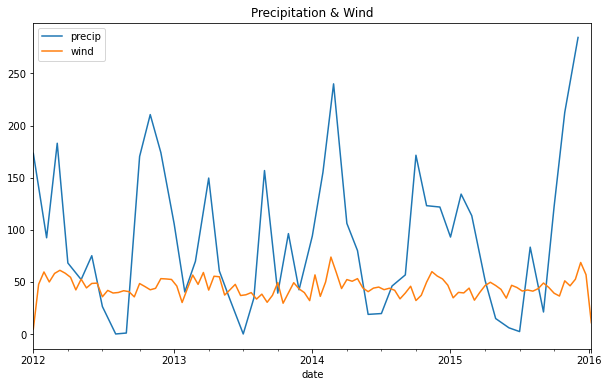

In [19]:
plt.figure(figsize=(10,6))

#plt.subplot(121)
seattle_wx.resample('M').precip.sum().plot()
#plt.xlabel('Months')
#plt.ylabel('Amount')
#plt.title('Precipitation')
#plt.subplot(122)
seattle_wx.resample('2w').wind.sum().plot()
#plt.xlabel('Month')
#plt.ylabel('Wind amount')
plt.title('Precipitation & Wind')
plt.legend()


Text(0.5, 1.0, 'Seattle Precipitation by month')

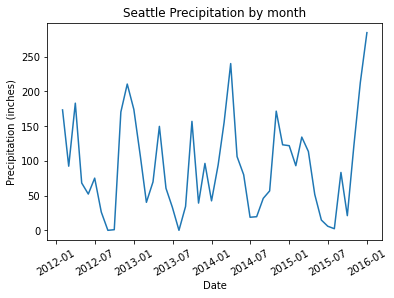

In [20]:
plt.plot(seattle_wx.resample('M').precip.sum())
plt.xticks(rotation=30)
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Seattle Precipitation by month')


In [21]:
high_wind_month = seattle_wx.resample('M').wind.max().idxmax().month_name()
high_wind_month_yr = seattle_wx.resample('M').wind.max().idxmax().year

print(f'Month & year with highest wind: {high_wind_month, high_wind_month_yr}')

Month & year with highest wind: ('December', 2012)


In [22]:
sunny_days = seattle_wx[seattle_wx.weather == "sun"]
sunny_days.resample('Y').weather.count().nlargest(n=1).index.month_name()


Index(['December'], dtype='object', name='date')

In [23]:
rainy_days = seattle_wx[seattle_wx.weather == 'rain']
rainy_days.resample('M').weather.count().nlargest(n=1)

date
2012-11-30    25
Freq: M, Name: weather, dtype: int64

In [24]:
seattle_wx[seattle_wx.precip > 0].resample('D').precip.count().groupby(seattle_wx.month).sum().idxmax()

'December'

In [25]:
flights_df = data.flights_20k()

flights_df.info()
flights_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [26]:
flights_df = flights_df.set_index(flights_df.date)
flights_df.drop(columns = ['date'], inplace=True)
flights_df.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND


In [27]:
flights_df['day'] = flights_df.index.strftime('%w-%a')
flights_df.head()


,delay,distance,origin,destination,day
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,6-Sat
2001-01-31 16:40:00,-5,1093,FLL,ISP,3-Wed
2001-02-11 18:39:00,3,293,LBB,DAL,0-Sun
2001-01-10 21:00:00,-15,550,MSY,MCO,3-Wed
2001-03-30 21:45:00,-2,229,STL,IND,5-Fri


In [28]:
flights_df['month'] = flights_df.index.strftime('%m-%b')
flights_df.head()

,delay,distance,origin,destination,day,month
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,6-Sat,01-Jan
2001-01-31 16:40:00,-5,1093,FLL,ISP,3-Wed,01-Jan
2001-02-11 18:39:00,3,293,LBB,DAL,0-Sun,02-Feb
2001-01-10 21:00:00,-15,550,MSY,MCO,3-Wed,01-Jan
2001-03-30 21:45:00,-2,229,STL,IND,5-Fri,03-Mar


In [29]:
flights_df.delay = flights_df.delay.clip(lower=0)

flights_df

,delay,distance,origin,destination,day,month
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,6-Sat,01-Jan
2001-01-31 16:40:00,0,1093,FLL,ISP,3-Wed,01-Jan
2001-02-11 18:39:00,3,293,LBB,DAL,0-Sun,02-Feb
2001-01-10 21:00:00,0,550,MSY,MCO,3-Wed,01-Jan
2001-03-30 21:45:00,0,229,STL,IND,5-Fri,03-Mar
...,...,...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK,4-Thu,03-Mar
2001-01-19 13:05:00,0,1489,SEA,MCI,5-Fri,01-Jan
2001-02-07 11:37:00,0,1848,MCO,PHX,3-Wed,02-Feb


In [30]:
flights_df['hour'] = flights_df.index.hour
flights_df.head()

,delay,distance,origin,destination,day,month,hour
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,6-Sat,01-Jan,14
2001-01-31 16:40:00,0,1093,FLL,ISP,3-Wed,01-Jan,16
2001-02-11 18:39:00,3,293,LBB,DAL,0-Sun,02-Feb,18
2001-01-10 21:00:00,0,550,MSY,MCO,3-Wed,01-Jan,21
2001-03-30 21:45:00,0,229,STL,IND,5-Fri,03-Mar,21


In [31]:
flights_df.delay.groupby(flights_df.hour).mean().nlargest(n=1)

hour
3    302.5
Name: delay, dtype: float64

In [32]:
flights_df.resample('H').delay.mean().idxmax()

Timestamp('2001-02-23 03:00:00', freq='H')

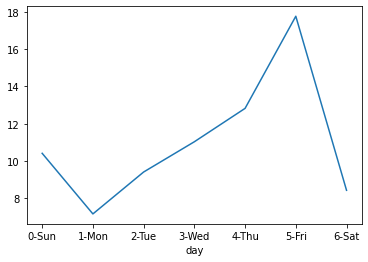

day
5-Fri    17.757596
4-Thu    12.821322
3-Wed    11.032478
0-Sun    10.413542
2-Tue     9.410866
6-Sat     8.431498
1-Mon     7.165772
Name: delay, dtype: float64

In [33]:
flights_df.delay.groupby(flights_df.day).mean().plot()
plt.show()
flights_df.delay.groupby(flights_df.day).mean().sort_values(ascending=False)



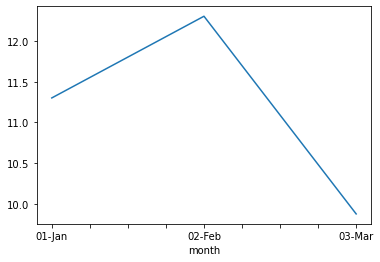

month
02-Feb    12.306106
01-Jan    11.301592
03-Mar     9.875287
Name: delay, dtype: float64

In [34]:
flights_df.delay.groupby(flights_df.month).mean().plot()
plt.show()
flights_df.delay.groupby(flights_df.month).mean().sort_values(ascending=False)


In [35]:
print(flights_df.month.max())
flights_df

03-Mar


,delay,distance,origin,destination,day,month,hour
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,6-Sat,01-Jan,14
2001-01-31 16:40:00,0,1093,FLL,ISP,3-Wed,01-Jan,16
2001-02-11 18:39:00,3,293,LBB,DAL,0-Sun,02-Feb,18
2001-01-10 21:00:00,0,550,MSY,MCO,3-Wed,01-Jan,21
2001-03-30 21:45:00,0,229,STL,IND,5-Fri,03-Mar,21
...,...,...,...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK,4-Thu,03-Mar,15
2001-01-19 13:05:00,0,1489,SEA,MCI,5-Fri,01-Jan,13
2001-02-07 11:37:00,0,1848,MCO,PHX,3-Wed,02-Feb,11


In [2]:
iowa_power = data.iowa_electricity()

iowa_power.info()
iowa_power.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [3]:
iowa_power.year.value_counts().sort_index()

2001-01-01    3
2002-01-01    3
2003-01-01    3
2004-01-01    3
2005-01-01    3
2006-01-01    3
2007-01-01    3
2008-01-01    3
2009-01-01    3
2010-01-01    3
2011-01-01    3
2012-01-01    3
2013-01-01    3
2014-01-01    3
2015-01-01    3
2016-01-01    3
2017-01-01    3
Name: year, dtype: int64

In [4]:
power_totals = iowa_power.groupby(iowa_power.year).net_generation.sum()

In [5]:
iowa_power.source.value_counts()

Fossil Fuels      17
Nuclear Energy    17
Renewables        17
Name: source, dtype: int64

In [6]:
iowa_power.net_generation

0     35361
1     35991
2     36234
3     36205
4     36883
5     37014
6     41389
7     42734
8     38620
9     42750
10    39361
11    37379
12    34873
13    35250
14    32319
15    28437
16    29329
17     3853
18     4574
19     3988
20     4929
21     4538
22     5095
23     4519
24     5282
25     4679
26     4451
27     5215
28     4347
29     5321
30     4152
31     5243
32     4703
33     5214
34     1437
35     1963
36     1885
37     2102
38     2724
39     3364
40     3870
41     5070
42     8560
43    10308
44    11795
45    14949
46    16476
47    17452
48    19091
49    21241
50    21933
Name: net_generation, dtype: int64

In [8]:
fossil_fuels = iowa_power.copy()[iowa_power.source == 'Fossil Fuels']
nuke_power = iowa_power.copy()[iowa_power.source == 'Nuclear Energy']
green_power = iowa_power.copy()[iowa_power.source == 'Renewables']

fossil_fuel_pct = (fossil_fuels.groupby('year').net_generation.sum() / iowa_power.groupby('year').net_generation.sum()) * 100
nuke_power_pct  = (nuke_power.groupby('year').net_generation.sum() / iowa_power.groupby('year').net_generation.sum()) * 100
green_pct = (green_power.groupby('year').net_generation.sum() / iowa_power.groupby('year').net_generation.sum()) * 100

print(f'Fossil fuel percentage: {fossil_fuel_pct}\nNuclear power percentage: {nuke_power_pct}\nRenewables percentage: {green_pct}')

Fossil fuel percentage: year
2001-01-01    86.986790
2002-01-01    84.628950
2003-01-01    86.052200
2004-01-01    83.738089
2005-01-01    83.549666
2006-01-01    81.397753
2007-01-01    83.147173
2008-01-01    80.499567
2009-01-01    74.471162
2010-01-01    74.336191
2011-01-01    69.824910
2012-01-01    65.953242
2013-01-01    61.536968
2014-01-01    62.000915
2015-01-01    57.047288
2016-01-01    52.292161
2017-01-01    51.931794
Name: net_generation, dtype: float64
Nuclear power percentage: year
2001-01-01     9.478242
2002-01-01    10.755267
2003-01-01     9.471109
2004-01-01    11.400222
2005-01-01    10.279760
2006-01-01    11.204451
2007-01-01     9.078308
2008-01-01     9.949893
2009-01-01     9.022542
2010-01-01     7.739658
2011-01-01     9.251211
2012-01-01     7.670049
2013-01-01     9.389448
2014-01-01     7.302916
2015-01-01     9.254585
2016-01-01     8.648241
2017-01-01     9.232240
Name: net_generation, dtype: float64
Renewables percentage: year
2001-01-01     3.53496

<AxesSubplot:xlabel='year', ylabel='net_generation'>

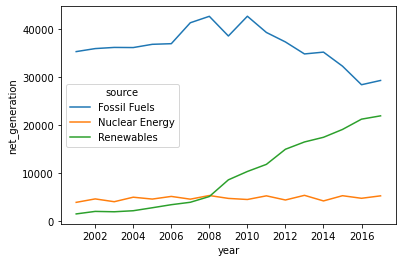

In [46]:
sns.lineplot(data = iowa_power, x= 'year', y= 'net_generation', hue='source')

In [50]:
iowa_power_yrs = iowa_power.copy().set_index(iowa_power.year)
iowa_power_yrs.head()

,source,net_generation
0,Fossil Fuels,35361
1,Fossil Fuels,35991
2,Fossil Fuels,36234
3,Fossil Fuels,36205
4,Fossil Fuels,36883
